# **分類**　決定木を利用した分類

分類の流れ

１．課題把握とゴールの設定

２，必要なライブラリのインポート

３．データセットの準備

４．予測モデルの学習

５．予測モデルの評価

６．予測

**１．課題把握とゴールの設定**

**課題**

乳房のしこりの検査データから、悪性であるか良性であるかを判断したい。

特に、悪性の判断を見落とさないようにしたい。

予測結果を診断の参考情報とするため、どのようなロジックで予測が行われたかを明確にしてほしい。

**ゴール**

しこりの検査データから、悪性か良性かを判定する分類の予測モデルを構築する。悪性の見落としの少ない予測モデルが望ましい。

悪性か良性かの判定根拠を可視化する。


**２．必要なライブラリーのインポート**

In [3]:
import pandas as pd

**３．データの取得**

scikit-learnのサンプルデータ「Breast cancer wisconsin dataset」を利用。
※Breast cancer wisconsin datasetは、**乳房のしこりの検査データ**と、そのデータに対する**悪性/良性を示したサンプルデータ**

In [4]:
#datasetsモジュールのload_breast_cancer関数をインポート
from sklearn.datasets import load_breast_cancer

In [5]:
#インポートしたload_beast_cancer関数を実行し、datasetという変数に代入
dataset = load_breast_cancer()
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

**４．データの概要確認と前処理**

データ概要はdatasetのDESCRキーに格納されている。

In [6]:
#データの概要を確認する。
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

.. _breast_cancer_dataset:

ウィスコンシン州の乳がん (診断) データセット
--------------------------------------------

**データセットの特性:**

    :インスタンス数: 569

    :属性の数: 30 個の数値、予測属性およびクラス

    :属性情報:
        - 半径 (中心から周囲の点までの距離の平均)
        - テクスチャ (グレースケール値の標準偏差)
        - 周囲
        - エリア
        - 滑らかさ（半径の長さの局所的な変動）
        - コンパクトさ (周囲^2 / 面積 - 1.0)
        - 凹面度 (輪郭の凹面部分の度合い)
        - 凹点（輪郭の凹部の数）
        - 対称性
        - フラクタル次元 (「海岸線近似」 - 1)

        平均値、標準誤差、および「最悪」または最大値 (3 つの値の平均)
        これらの特徴の最悪/最大値) が画像ごとに計算され、
        結果として 30 個の特徴が得られます。たとえば、フィールド 0 は平均半径です。
        10 は半径 SE、フィールド 20 は最悪半径です。

        - クラス：
                - WDBC-悪性
                - WDBC-良性

:概要統計:

    ===================================== ====== ======
                                           最小最大
    ===================================== ====== ======
    半径 (平均): 6.981 28.11
    テクスチャー (平均): 9.71 39.28
    周長 (平均): 43.79 188.5
    面積 (平均): 143.5 2501.0
    滑らかさ（平均）: 0.053 0.163
    コンパクトさ (平均): 0.019 0.345
    凹面(平均): 0.0 0.427
    凹点 (平均): 0.0 0.201
    対称性 (平均): 0.106 0.304
    フラクタル次元 (平均): 0.05 0.097
    半径 (標準誤差): 0.112 2.873
    テクスチャ (標準誤差): 0.36 4.885
    周長 (標準誤差): 0.757 21.98
    面積 (標準誤差): 6.802 542.2
    滑らかさ（標準誤差）：0.002 0.031
    コンパクトネス (標準誤差): 0.002 0.135
    凹度(標準誤差): 0.0 0.396
    凹点（標準誤差）：0.0 0.053
    対称性 (標準誤差): 0.008 0.079
    フラクタル次元 (標準誤差): 0.001 0.03
    半径 (最悪): 7.93 36.04
    テクスチャー (最悪): 12.02 49.54
    周長(最悪): 50.41 251.2
    エリア(最悪): 185.2 4254.0
    平滑度（最悪）：0.071 0.223
    コンパクトさ (最悪): 0.027 1.058
    凹み（最悪）：0.0 1.252
    凹点（最悪）：0.0 0.291
    対称性 (最悪): 0.156 0.664
    フラクタル次元 (最悪): 0.055 0.208
    ===================================== ====== ======
    
    :欠落している属性値: なし

    :クラス分布: 212 - 悪性、357 - 良性

    :作成者: ウィリアム H. ウォルバーグ博士、W. ニック ストリート、オルヴィ L. マンガサリアン

    :寄付者: ニック・ストリート

    ：日付：1995年11月

何に対するデータか：乳房のしこりに対する検査結果のデータ

検査データの項目数：３０項目

どのような項目があるか：半径やコンパクト性、へこみ具合など

データ数：569、それぞれ悪性、良性に分類される。

In [34]:
#datasetのdataキーにしこりの検査データが、feature_namesキーに各要素の名称が格納されている。
#DataFrameを利用して表示させる。
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
#列名を日本語に変換する。 "'半径 (平均)', 'テクスチャー (平均)', '周長 (平均)', '面積 (平均)', '滑らかさ（平均）', 'コンパクトさ (平均)', '凹面(平均)', '凹点 (平均)', '対称性 (平均)', 'フラクタル次元 (平均)', '半径 (標準誤差)', 'テクスチャ (標準誤差)', '周長 (標準誤差)', '面積 (標準誤差)', '滑らかさ（標準誤差)', 'コンパクトネス (標準誤差)', '凹度(標準誤差)', '凹点（標準誤差)', '対称性 (標準誤差)', 'フラクタル次元 (標準誤差)', '半径 (最悪)', 'テクスチャー (最悪)', '周長(最悪)', 'エリア(最悪)', '平滑度（最悪）', 'コンパクトさ (最悪)', '凹み（最悪）', '凹点（最悪）', '対称性 (最悪)', 'フラクタル次元 (最悪)'"
feature_names_JPN = ['半径 (平均)', 'テクスチャー (平均)', '周長 (平均)', '面積 (平均)', '滑らかさ（平均）', 'コンパクトさ (平均)', '凹面(平均)', '凹点 (平均)', '対称性 (平均)', 'フラクタル次元 (平均)', '半径 (標準誤差)', 'テクスチャ (標準誤差)', '周長 (標準誤差)', '面積 (標準誤差)', '滑らかさ（標準誤差)', 'コンパクトネス (標準誤差)', '凹度(標準誤差)', '凹点（標準誤差)', '対称性 (標準誤差)', 'フラクタル次元 (標準誤差)', '半径 (最悪)', 'テクスチャー (最悪)', '周長(最悪)', 'エリア(最悪)', '平滑度（最悪）', 'コンパクトさ (最悪)', '凹み（最悪）', '凹点（最悪）', '対称性 (最悪)', 'フラクタル次元 (最悪)']
df.columns = feature_names_JPN
df.head()

,半径 (平均),テクスチャー (平均),周長 (平均),面積 (平均),滑らかさ（平均）,コンパクトさ (平均),凹面(平均),凹点 (平均),対称性 (平均),フラクタル次元 (平均),...,半径 (最悪),テクスチャー (最悪),周長(最悪),エリア(最悪),平滑度（最悪）,コンパクトさ (最悪),凹み（最悪）,凹点（最悪）,対称性 (最悪),フラクタル次元 (最悪)
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [43]:
#悪性、良性を示すデータをclassという列名でDataFrameに追加する。
#悪性、良性のデータはdatasetのtargetキーに格納されている。
df['クラス'] = dataset.target
df.head()

,半径 (平均),テクスチャー (平均),周長 (平均),面積 (平均),滑らかさ（平均）,コンパクトさ (平均),凹面(平均),凹点 (平均),対称性 (平均),フラクタル次元 (平均),...,テクスチャー (最悪),周長(最悪),エリア(最悪),平滑度（最悪）,コンパクトさ (最悪),凹み（最悪）,凹点（最悪）,対称性 (最悪),フラクタル次元 (最悪),クラス
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [44]:
#データのサイズの確認
df.shape

(569, 31)

In [45]:
#データの欠損の有無を確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   半径 (平均)         569 non-null    float64
 1   テクスチャー (平均)     569 non-null    float64
 2   周長 (平均)         569 non-null    float64
 3   面積 (平均)         569 non-null    float64
 4   滑らかさ（平均）        569 non-null    float64
 5   コンパクトさ (平均)     569 non-null    float64
 6   凹面(平均)          569 non-null    float64
 7   凹点 (平均)         569 non-null    float64
 8   対称性 (平均)        569 non-null    float64
 9   フラクタル次元 (平均)    569 non-null    float64
 10  半径 (標準誤差)       569 non-null    float64
 11  テクスチャ (標準誤差)    569 non-null    float64
 12  周長 (標準誤差)       569 non-null    float64
 13  面積 (標準誤差)       569 non-null    float64
 14  滑らかさ（標準誤差)      569 non-null    float64
 15  コンパクトネス (標準誤差)  569 non-null    float64
 16  凹度(標準誤差)        569 non-null    float64
 17  凹点（標準誤差)        569 non-null    flo

array([[<Axes: title={'center': '半径 (平均)'}>,
        <Axes: title={'center': 'テクスチャー (平均)'}>,
        <Axes: title={'center': '周長 (平均)'}>,
        <Axes: title={'center': '面積 (平均)'}>,
        <Axes: title={'center': '滑らかさ（平均）'}>,
        <Axes: title={'center': 'コンパクトさ (平均)'}>],
       [<Axes: title={'center': '凹面(平均)'}>,
        <Axes: title={'center': '凹点 (平均)'}>,
        <Axes: title={'center': '対称性 (平均)'}>,
        <Axes: title={'center': 'フラクタル次元 (平均)'}>,
        <Axes: title={'center': '半径 (標準誤差)'}>,
        <Axes: title={'center': 'テクスチャ (標準誤差)'}>],
       [<Axes: title={'center': '周長 (標準誤差)'}>,
        <Axes: title={'center': '面積 (標準誤差)'}>,
        <Axes: title={'center': '滑らかさ（標準誤差)'}>,
        <Axes: title={'center': 'コンパクトネス (標準誤差)'}>,
        <Axes: title={'center': '凹度(標準誤差)'}>,
        <Axes: title={'center': '凹点（標準誤差)'}>],
       [<Axes: title={'center': '対称性 (標準誤差)'}>,
        <Axes: title={'center': 'フラクタル次元 (標準誤差)'}>,
        <Axes: title={'center': '半径 (最悪)'}>,
     

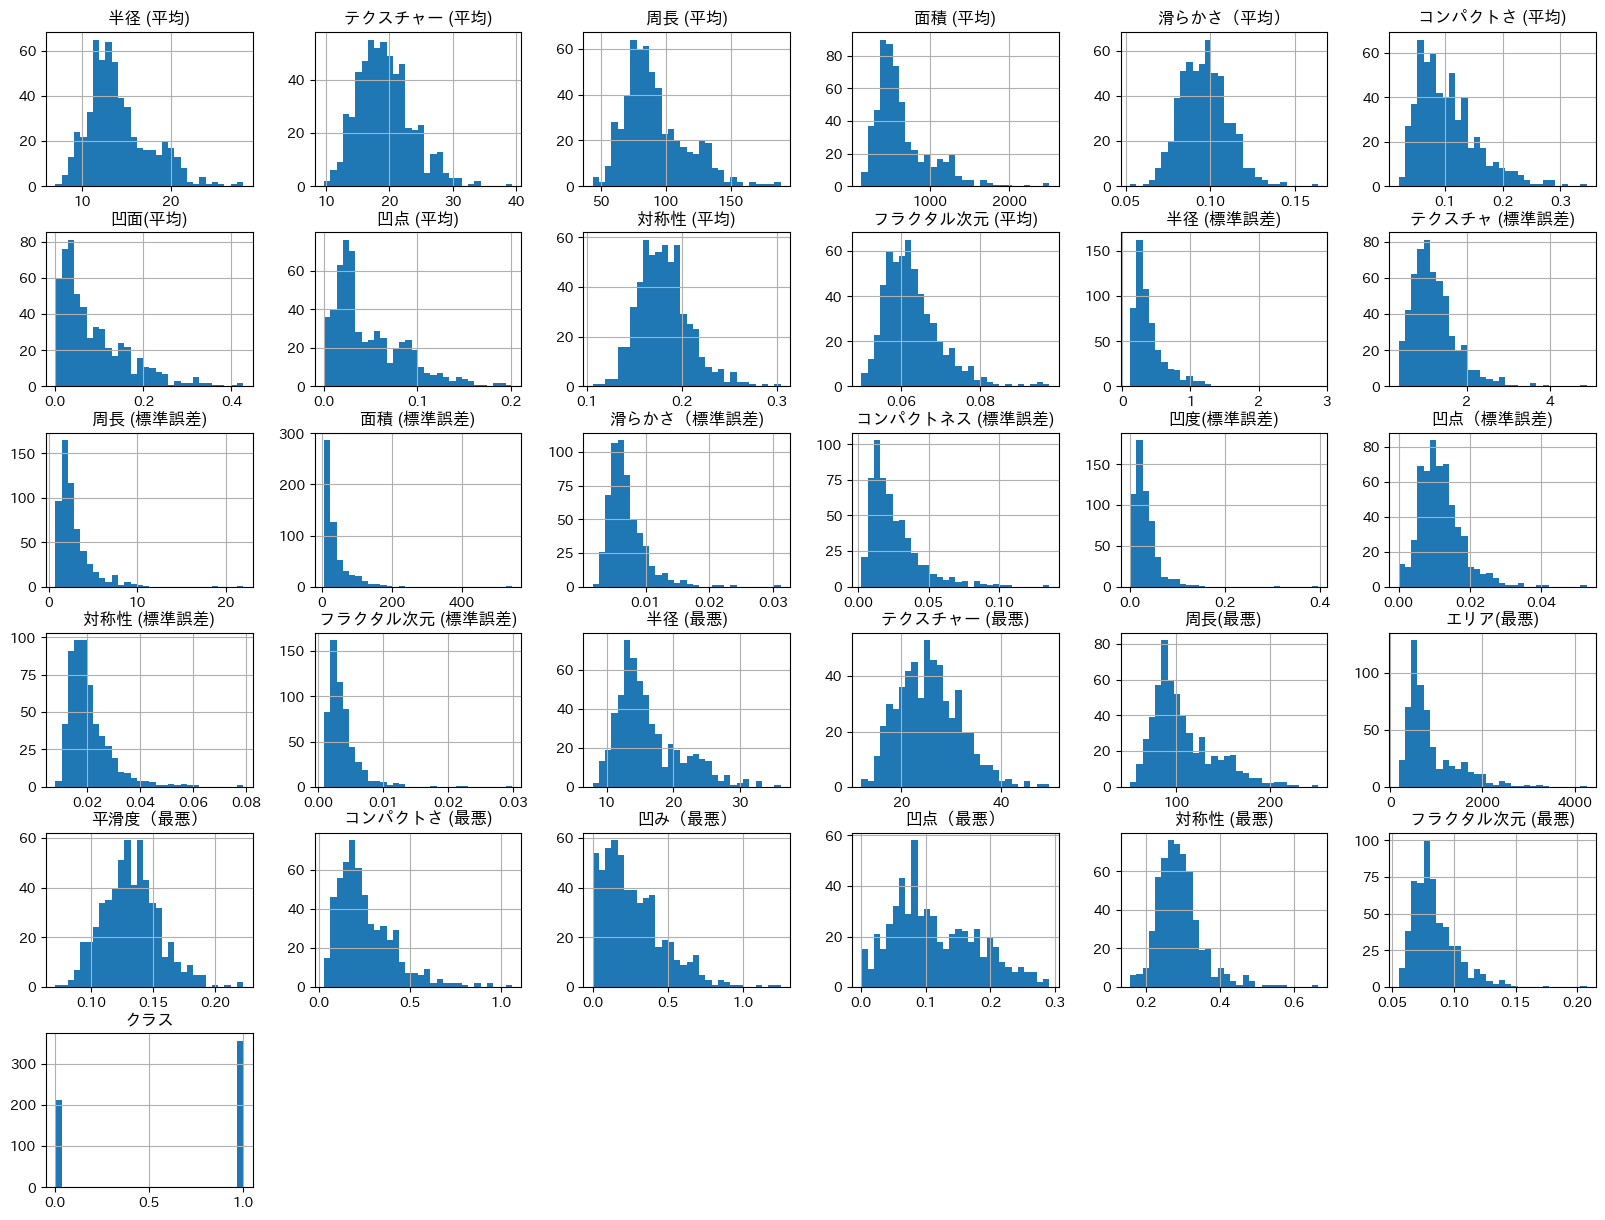

In [46]:
#外れ値の確認　ヒスとフラムで可視化する。figsizeは(20,15)、バーの数は30を指定する。
df.hist(figsize=(20, 15), bins=30)

**５．学習データとテストデータへの分割**

説明変数X = クラス列以外の全列のデータ

目的変数y = クラス列のデータ

In [47]:
X = df.drop(columns=['クラス']).to_numpy()
y = df['クラス'].to_numpy()

In [48]:
#日本語文字化け防止
!pip install japanize-matplotlib
import japanize_matplotlib

array([[<Axes: title={'center': '半径 (平均)'}>,
        <Axes: title={'center': 'テクスチャー (平均)'}>,
        <Axes: title={'center': '周長 (平均)'}>,
        <Axes: title={'center': '面積 (平均)'}>,
        <Axes: title={'center': '滑らかさ（平均）'}>,
        <Axes: title={'center': 'コンパクトさ (平均)'}>],
       [<Axes: title={'center': '凹面(平均)'}>,
        <Axes: title={'center': '凹点 (平均)'}>,
        <Axes: title={'center': '対称性 (平均)'}>,
        <Axes: title={'center': 'フラクタル次元 (平均)'}>,
        <Axes: title={'center': '半径 (標準誤差)'}>,
        <Axes: title={'center': 'テクスチャ (標準誤差)'}>],
       [<Axes: title={'center': '周長 (標準誤差)'}>,
        <Axes: title={'center': '面積 (標準誤差)'}>,
        <Axes: title={'center': '滑らかさ（標準誤差)'}>,
        <Axes: title={'center': 'コンパクトネス (標準誤差)'}>,
        <Axes: title={'center': '凹度(標準誤差)'}>,
        <Axes: title={'center': '凹点（標準誤差)'}>],
       [<Axes: title={'center': '対称性 (標準誤差)'}>,
        <Axes: title={'center': 'フラクタル次元 (標準誤差)'}>,
        <Axes: title={'center': '半径 (最悪)'}>,
     

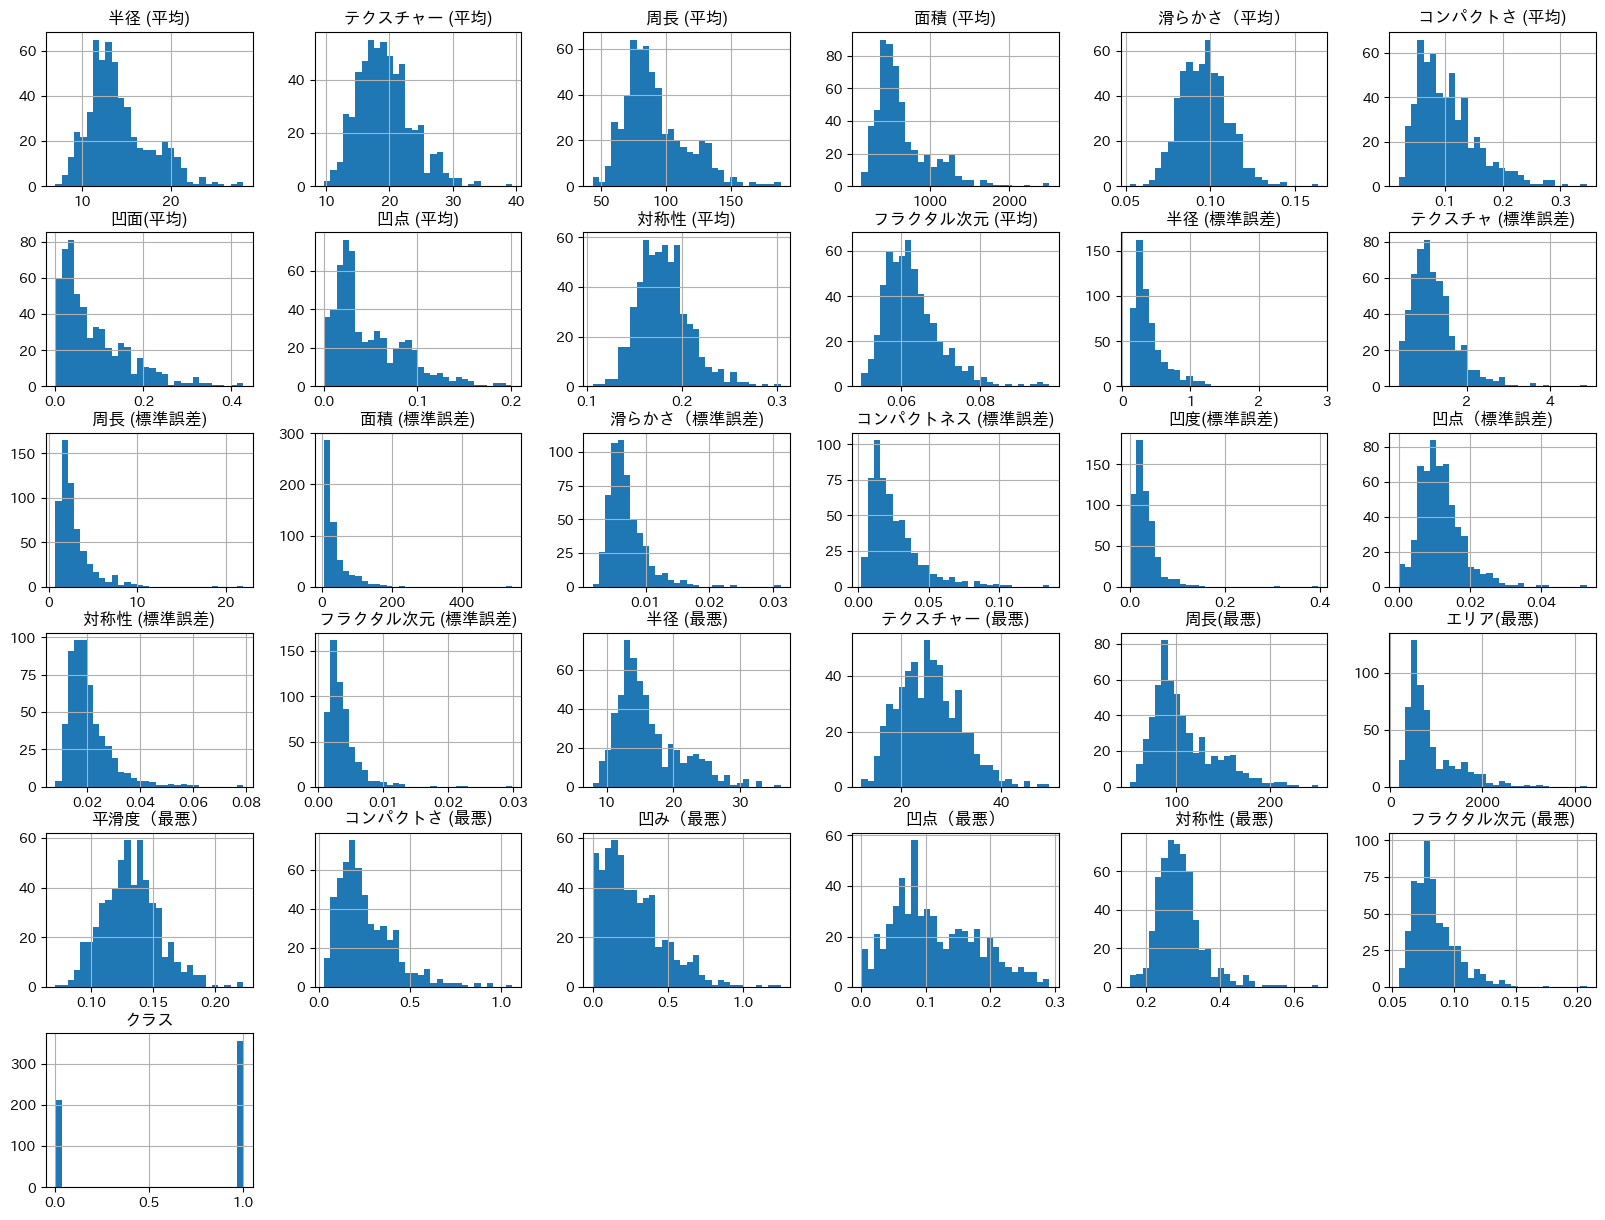

In [49]:
#外れ値の確認。　figsizeは20,15、バーの数は30を指定。
df.hist(figsize=(20,15), bins=30)

**５．学習データとテストデータへの分割**

In [50]:
#説明変数Xと目的変数yに分ける。
X = df.drop(columns=['クラス']).to_numpy()
y = df['クラス'].to_numpy()

In [51]:
#Xとyをそれぞれ学習データとテストデータに分割する。
#train_test_split関数をインポートし、比率7:3で学習データとテストデータに分割する。
#実行ごとに配分されるデータが変わるのを避けたい場合は、random_stateを指定する。
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [52]:
#問題なく7:3に分割されたかデータ数を確認する。
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 30) (171, 30) (398,) (171,)


**6．予測モデルの学習**

決定木の予測モデルに対して学習を行う。

scikit-learnで提供されている決定偽の予測モデルのクラスは、treeモジュールのDecisionTreeClassifier。

決定偽は予測モデル構築時に乱数を使用する場合がある。

実行ごとに結果が変わるのを避けたい場合はrandom_stateを指定する。

In [53]:
#DecisionTreeClassifierクラスをインスタンス化して、modelという変数に代入
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)

In [54]:
#テストデータで学習させる。
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

**７．予測モデルの評価**

分類の予測モデルには、正解率・適合率・再現率といった複数の評価指標がある。

Scikit-learnにはこれらの指標を一挙に出力できるclassification_reportという関数がある。

classification_report関数の実行時には、引数として実際の値と予測値が必要である。

In [55]:
#説明変数Xのテストデータから悪性/良性の予測値を出力する。
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [56]:
#実際の値である目的変数のテストデータを確認する。
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [58]:
#classification_reportで評価指標を出力する。
#metricsモジュールのclassification_repot関数をインポートし、第1引数にy_testを、第2引数にy_predを指定する。
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        63
           1       0.96      0.90      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171



precision:適合率

recall:再現率

accuracy:正解率

macro avg:各ラベルの数値の平均値

weighted avg:実際のデータ数を重みとした加重平均


今回の課題は

・乳房のしこりの検査データから、悪性であるか良性であるかを判断したい

・特に、悪性の判断を見落とさないようにしたい

よって、正解率と悪性の再現率が課題指標として有効である。

予測モデルの正解率は約91%、悪性の再現率は約94%と評価できる。

**８．予測**

In [59]:
#data_breastcancer.csvファイルを読み込む
df_X_new = pd.read_csv('/content/data_breastcancer.csv')
df_X_new.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,15,25,83,643,0.08,0.04,0.05,0.02,0.2,0.04,...,14,34,90,600,0.10,0.1,0.10,0.06,0.2,0.06
1,13,18,84,587,0.06,0.06,0.02,0.01,0.2,0.05,...,15,19,100,700,0.10,0.2,0.09,0.08,0.2,0.06
2,14,22,87,587,0.13,0.09,0.02,0.08,0.1,0.05,...,15,29,113,800,0.10,0.2,0.50,102.00,0.1,0.09
3,12,19,90,589,0.09,0.07,0.03,0.01,0.1,0.06,...,15,25,108,800,0.09,0.2,0.14,0.08,0.2,0.06


In [60]:
#列名を日本語に変換する。 "'半径 (平均)', 'テクスチャー (平均)', '周長 (平均)', '面積 (平均)', '滑らかさ（平均）', 'コンパクトさ (平均)', '凹面(平均)', '凹点 (平均)', '対称性 (平均)', 'フラクタル次元 (平均)', '半径 (標準誤差)', 'テクスチャ (標準誤差)', '周長 (標準誤差)', '面積 (標準誤差)', '滑らかさ（標準誤差)', 'コンパクトネス (標準誤差)', '凹度(標準誤差)', '凹点（標準誤差)', '対称性 (標準誤差)', 'フラクタル次元 (標準誤差)', '半径 (最悪)', 'テクスチャー (最悪)', '周長(最悪)', 'エリア(最悪)', '平滑度（最悪）', 'コンパクトさ (最悪)', '凹み（最悪）', '凹点（最悪）', '対称性 (最悪)', 'フラクタル次元 (最悪)'"
df_X_new.columns = feature_names_JPN
df_X_new.head()

,半径 (平均),テクスチャー (平均),周長 (平均),面積 (平均),滑らかさ（平均）,コンパクトさ (平均),凹面(平均),凹点 (平均),対称性 (平均),フラクタル次元 (平均),...,半径 (最悪),テクスチャー (最悪),周長(最悪),エリア(最悪),平滑度（最悪）,コンパクトさ (最悪),凹み（最悪）,凹点（最悪）,対称性 (最悪),フラクタル次元 (最悪)
0,15,25,83,643,0.08,0.04,0.05,0.02,0.2,0.04,...,14,34,90,600,0.10,0.1,0.10,0.06,0.2,0.06
1,13,18,84,587,0.06,0.06,0.02,0.01,0.2,0.05,...,15,19,100,700,0.10,0.2,0.09,0.08,0.2,0.06
2,14,22,87,587,0.13,0.09,0.02,0.08,0.1,0.05,...,15,29,113,800,0.10,0.2,0.50,102.00,0.1,0.09
3,12,19,90,589,0.09,0.07,0.03,0.01,0.1,0.06,...,15,25,108,800,0.09,0.2,0.14,0.08,0.2,0.06


In [65]:
#予測モデルを利用して、取り込んだデータをもとに悪性であるか良性であるかを予測する。
X_new = df_X_new.to_numpy()
model.predict(X_new)


array([1, 1, 0, 1])

**９．設定したゴールに対する考察**

**・しこりの検査データから、悪性か良性かを判定する分類の予測モデルを構築する。悪性の見落としが少ない予測モデルが望ましい。**

しこりの検査データをインプットし、悪性/良性の予測結果を出力売るという予測モデルを構築できた。

予測の精度については正解率が91%。悪性の再現率は約94%。

悪性の再現率はまずますだが、正解率に関してはやや低い印象。

**・悪性か良性かの判定根拠を可視化する。**

悪性/良性の判定根拠措置絵決定偽の条件分岐構造を参考にできる。

treeモジュールのexport_text関数によって、決定木の条件分岐の可視化が可能。

In [66]:
#export_text関数をインポートする。
from sklearn.tree import export_text

予測モデルであるmodelを引数に指定してexport_text関数を実行すると、条件分岐構造を出力できる。

export_text関数には引数として指定できるいくつかのパラメータがある。

feature_namesパラメータによって条件分岐式に出力される要素名を指定可能。

decimalsパラメータによって条件分岐式に出力される数値の、小数点以下の桁数を指定できる。

なお、feature_namesパラメータは要素名をリスト形式で指定する必要がある。

事前にdatesetのfeature_namesキーから要素名を取得し、tolistメソッドでndarrayからlistへ変換しておく。

In [71]:
#要素名の取得
names = dataset.feature_names
#要素名をリスト形式に変換
names_list = names.tolist()
#要素名を日本語に変換する
names_list = feature_names_JPN
#条件分岐構造を出力
print(export_text(model, decimals=3, feature_names=names_list))

|--- 凹点（最悪） <= 0.142
|   |--- エリア(最悪) <= 952.900
|   |   |--- 面積 (標準誤差) <= 35.260
|   |   |   |--- 凹点（最悪） <= 0.136
|   |   |   |   |--- 滑らかさ（標準誤差) <= 0.003
|   |   |   |   |   |--- 滑らかさ（標準誤差) <= 0.003
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- 滑らかさ（標準誤差) >  0.003
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- 滑らかさ（標準誤差) >  0.003
|   |   |   |   |   |--- テクスチャー (最悪) <= 32.780
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- テクスチャー (最悪) >  32.780
|   |   |   |   |   |   |--- テクスチャー (最悪) <= 33.805
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- テクスチャー (最悪) >  33.805
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- 凹点（最悪） >  0.136
|   |   |   |   |--- 対称性 (最悪) <= 0.271
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- 対称性 (最悪) >  0.271
|   |   |   |   |   |--- class: 1
|   |   |--- 面積 (標準誤差) >  35.260
|   |   |   |--- テクスチャー (最悪) <= 27.335
|   |   |   |   |--- 対称性 (最悪) <= 0.200
|   |   |   |   |   |--- clas

決定木のツリー構造を分かりやすく表示する。

https://bigdata-tools.com/decision-treee/

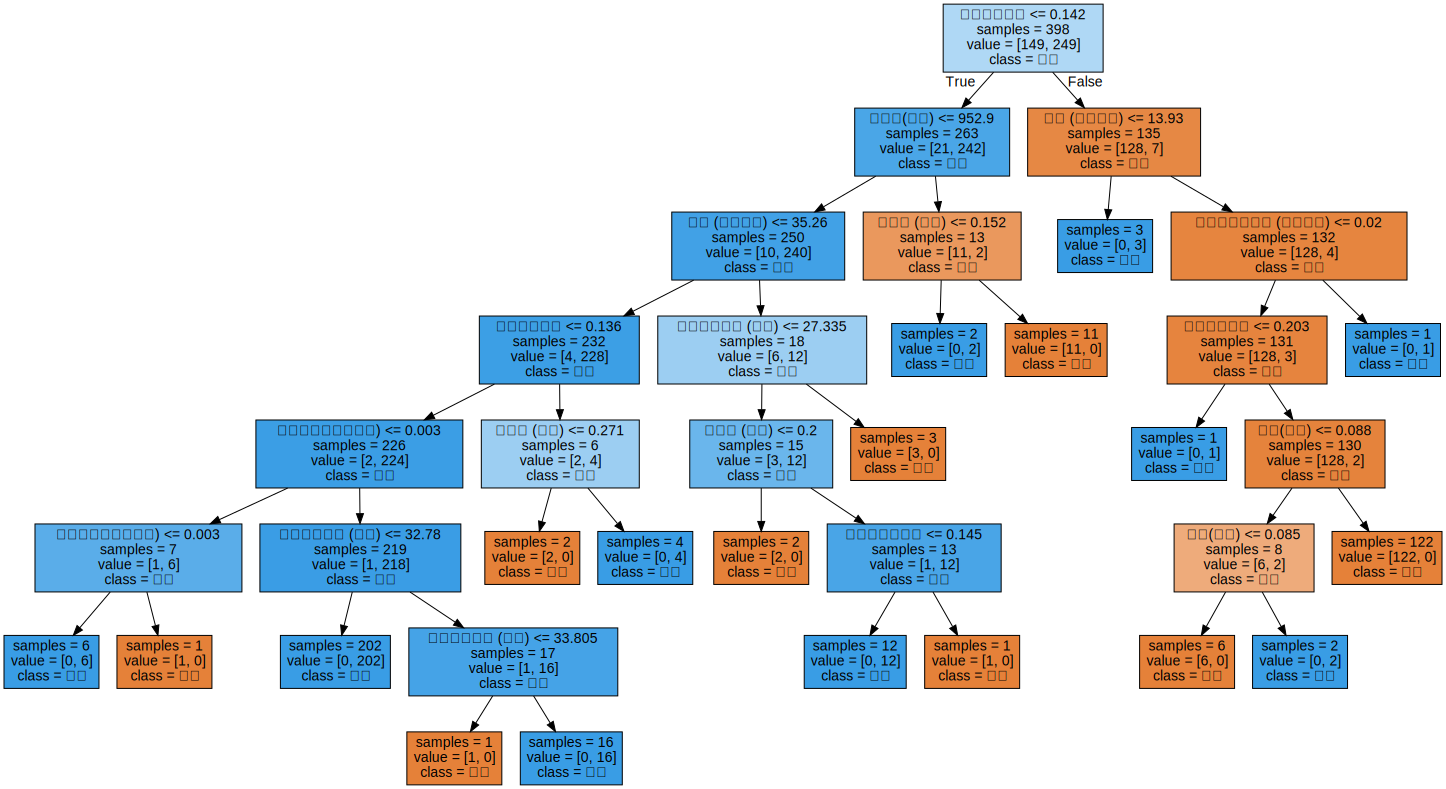

In [80]:
#export_graphvizのインポート
from sklearn.tree import export_graphviz
#graphvizのインポート
import graphviz

tree_data=export_graphviz(model, out_file=None, class_names=["悪性", "良性"],
                feature_names=names_list, impurity=False, filled=True)

graphviz.Source(tree_data)

# 予測モデルの改善

現状の予測精度は正解率が約91％、悪性の再現率が約94%。

この精度をさらに高めたい。

１．条件分岐の構造に対する制約の設定

２．予測モデルの学習

３．予測モデルの評価

４，予測

５．設定したゴールに対する考察

**１．条件分岐の構造に対する制約の設定**

決定木は条件分岐の構造をシンプルにすることで予測精度が高まる可能性がある。

・条件分岐の深さ

・構造の葉の数

・葉に含まれるサンプル数

等の制約

DecisionTreeClassifilerクラスをインスタンス化するタイミングで、これらのハイパラメーター設定が可能である。

ハイパラメータの設定値は、

・分析者が試行錯誤しながら決定すること

・「グリッドサーチ」という手法により、指定したハイパラメータのすべての組み合わせに対して学習を行い、もっとも高い精度を示したハイパラメータを採用すること

があげられる。

今回は、以下の通りハイパーパラメータを設定する。

条件分岐の深さ　max_depth 2

葉の数の最大値　max_leaf_nodes 3

葉に含まれるサンプル数の最小値　min_samples_leaf 10

In [84]:
model = DecisionTreeClassifier(
    max_depth=2,
    max_leaf_nodes=3,
    min_samples_leaf=10,
    random_state=0)

**２．予測モデルの学習**

In [85]:
#テストデータで学習させる。
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3, min_samples_leaf=10,
                       random_state=0)

**３．予測モデルの評価**

In [86]:
#予測モデルで説明変数Xのテストデータから悪性/良性の予測値を出力する。
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [87]:
#classification_reportで評価指標を出力
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        63
           1       0.97      0.94      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



正解率が約91％から約95％に、悪性の再現率が94%から95%に向上している。

**４．予測**

In [88]:
#予測モデルを活用して、しこりの検査データから悪性/良性を予測する。
model.predict(X_new)

array([1, 1, 0, 1])

**５．設定したゴールに対する考察**

**・しこりの検査データから、悪性か良性かを判定する分類の予測モデルを構築する。悪性の見落としが少ない予測モデルが望ましい。**

決定木の条件分岐構造をシンプルにすることで、予測の精度が高まった。
正解率は約95%、悪性の再現率は約95%となった。

**・悪性か良性かの判定根拠を可視化する**

In [89]:
print(export_text(model, decimals=3, feature_names=names_list))

|--- 凹点（最悪） <= 0.142
|   |--- エリア(最悪) <= 952.900
|   |   |--- class: 1
|   |--- エリア(最悪) >  952.900
|   |   |--- class: 0
|--- 凹点（最悪） >  0.142
|   |--- class: 0



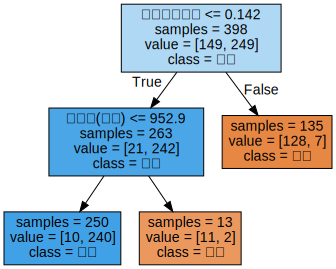

In [90]:
tree_data=export_graphviz(model, out_file=None, class_names=["悪性", "良性"],
                feature_names=names_list, impurity=False, filled=True)

graphviz.Source(tree_data)